<a href="https://colab.research.google.com/github/MattWroclaw/data-science-bootcamp/blob/main/Computer_vision/rectangle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Wykrywanie prostokątnych obiektów z obrazu**

Celem tego notebook'a jest zrozumienie podstaw detekcji elementów z obrazu.

#### **Spis treści:**
1. [Import bibliotek](#a0)
2. [Wczytanie obrazu](#a1)
3. [Konwersja do odcieni szarości](#a2)
4. [Detekcja krawędzi](#a3)
5. [Detekcja konturu](#a4)
6. [Detekcja prostokąta](#a5)
7. [Wyświetlenie znalezionego kształtu](#a6)

#### **Uwagi:**
>Kurs został stworzony przy pomocy biblioteki w wersji 4.1.2.  
>Aby zaktualizować bibliotekę OpenCV do aktualniej wersji należy użyć polecenia:
```
!pip install --upgrade opencv-python
```
Bądź zainstalować wybierając konkretną wersję, np.
```
!pip install opencv-python==4.1.2.30
```

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

cv2.__version__

'4.10.0'

### <a name='a1'></a> Wczytanie obrazu

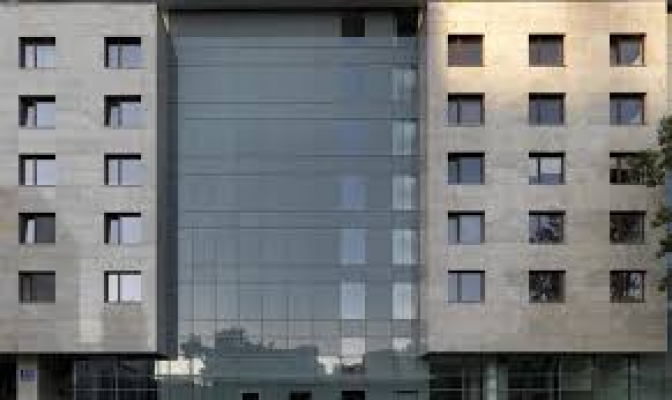

In [57]:
image = cv2.imread('blok4.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

### <a name='a2'></a> Konwersja do odcieni szarości

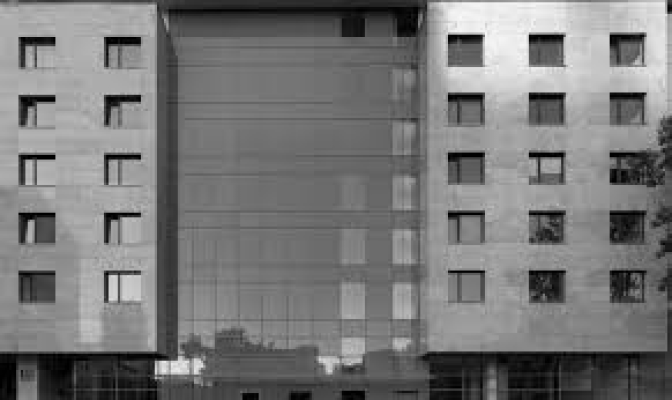

In [58]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

### <a name='a3'></a> Detekcja krawędzi

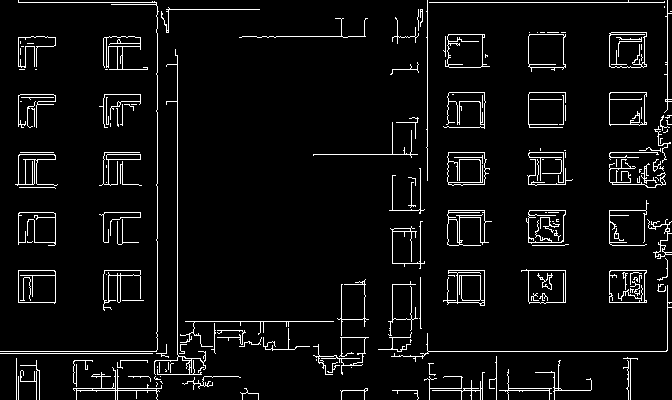

In [59]:
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

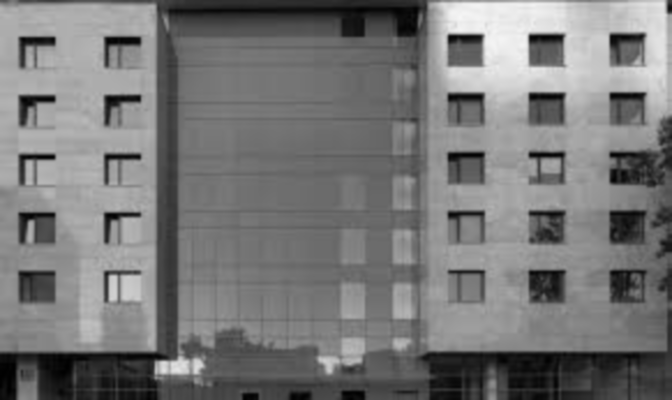

In [60]:
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5, 5), sigmaX=0)
cv2_imshow(gray_image)

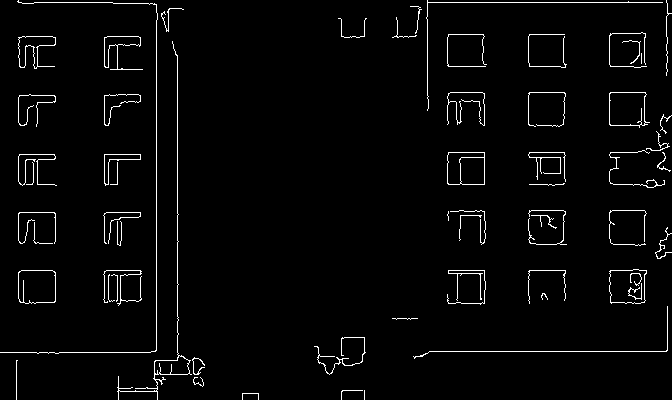

In [61]:
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges)

### <a name='a4'></a> Detekcja konturu

In [62]:
contours = cv2.findContours(image=edges.copy(),
                            mode=cv2.RETR_TREE,
                            method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

Ten fragment kodu wykonuje kilka operacji na konturach znalezionych w obrazie. Oto co robi każda linia:

1. `contours = cv2.findContours(image=edges.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)`: Ta linia kodu znajduje kontury w obrazie `edges` za pomocą funkcji `cv2.findContours`. Parametr `mode` określa sposób grupowania konturów, a `method` określa metodę aproksymacji konturów. Wynik jest przypisywany do zmiennej `contours`.

2. `contours = imutils.grab_contours(contours)`: Ta linia kodu konwertuje wynik zwrócony przez `cv2.findContours` na listę konturów. Ta funkcja jest pomocna, ponieważ zachowuje spójność w zwracanych danych niezależnie od wersji OpenCV.

3. `contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]`: Ta linia kodu sortuje listę konturów w kolejności malejącej na podstawie ich powierzchni (obszaru zajmowanego przez kontur) za pomocą funkcji `cv2.contourArea`. Następnie wybiera 10 największych konturów i przypisuje je z powrotem do zmiennej `contours`.

Ogólnie rzecz biorąc, ten fragment kodu znajduje kontury w obrazie, konwertuje wynik na listę konturów, sortuje je według powierzchni i wybiera 10 największych konturów do dalszego przetwarzania.

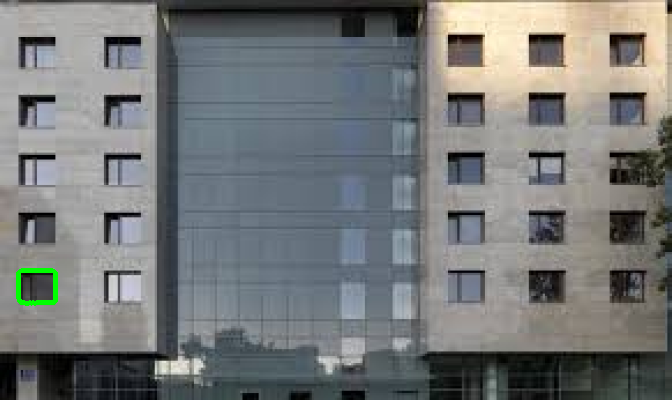

In [63]:
cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[0]], contourIdx=-1,
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt1)

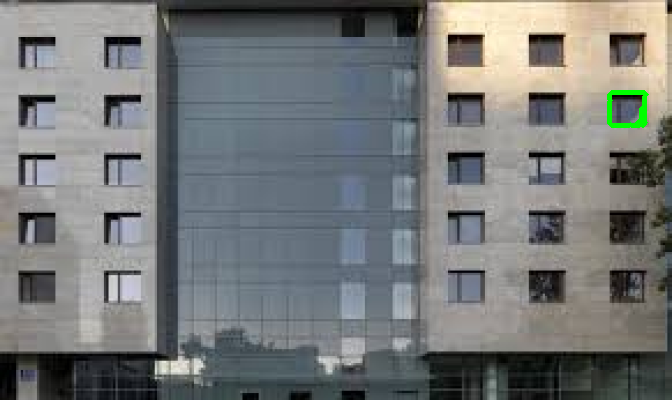

In [64]:
cnt2 = cv2.drawContours(image=image.copy(), contours=[contours[4]], contourIdx=-1,
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt2)

Ten kod wykonuje rysowanie konturów na obrazie za pomocą funkcji `cv2.drawContours` i wyświetla wynik za pomocą `cv2_imshow`.

Oto co robi każda linia:

1. `vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)`: Ta linia kodu rysuje kontury na kopii obrazu `image`. Parametr `contours` zawiera kontury, które mają zostać narysowane. W tym przypadku używamy konturu `screen_contour`. Parametr `contourIdx` ustawiony na -1 oznacza, że wszystkie kontury zostaną narysowane. Parametr `color` określa kolor konturów, a `thickness` określa grubość linii.

2. `cv2_imshow(vertices)`: Ta linia kodu wyświetla obraz `vertices`, który zawiera narysowane kontury, za pomocą funkcji `cv2_imshow`. Ta funkcja jest często używana w środowisku Google Colab do wyświetlania obrazów.

Ogólnie rzecz biorąc, ten kod rysuje kontury na obrazie i wyświetla wynik, pozwalając na wizualną inspekcję konturów na obrazie.

### <a name='a5'></a> Detekcja prostokąta

In [65]:
screen_contour = None

for contour in contours:
    perimeter = cv2.arcLength(curve=contour, closed=True)
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

    if len(approx) == 4:
        screen_contour = approx
        break

Ten kod służy do znajdowania konturu, który jest przybliżeniem prostokąta na podstawie listy konturów `contours`.

1. Na początku ustawiamy zmienną `screen_contour` na `None`, co oznacza, że na początku nie mamy jeszcze znalezionego konturu, który spełnia nasze kryteria.

2. Następnie iterujemy przez listę konturów `contours`. Dla każdego konturu obliczamy obwód (perimeter) za pomocą funkcji `cv2.arcLength` oraz przybliżamy kontur za pomocą funkcji `cv2.approxPolyDP`. Funkcja `cv2.approxPolyDP` przybliża kontur do bardziej prostych kształtów na podstawie zadanego epsilon (błędu) i obwodu konturu.

3. Sprawdzamy, czy przybliżony kontur ma 4 wierzchołki (czy jest to prostokąt). Jeśli tak, przypisujemy ten kontur do zmiennej `screen_contour` i przerywamy pętlę za pomocą `break`. Dzięki temu, gdy znajdziemy pierwszy kontur spełniający warunek, zapisujemy go i przerywamy dalsze przeszukiwanie listy konturów.

Ogólnie rzecz biorąc, ten kod służy do znalezienia konturu, który jest przybliżeniem prostokąta, na podstawie listy konturów, i zapisuje ten kontur w zmiennej `screen_contour`.

In [66]:
screen_contour

array([[[ 18, 272]],

       [[ 20, 302]],

       [[ 55, 301]],

       [[ 54, 271]]], dtype=int32)

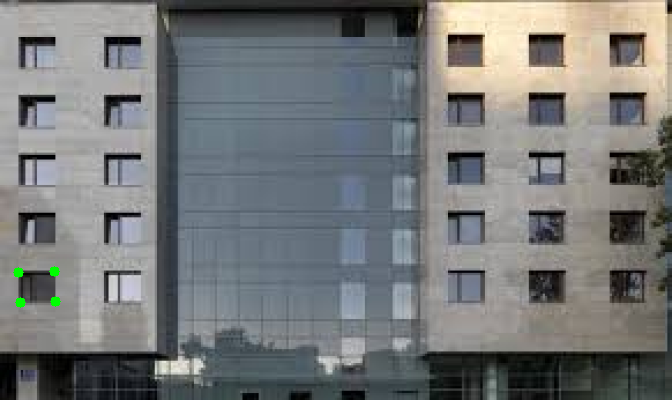

In [67]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv2_imshow(vertices)

Ten kod wykonuje rysowanie konturów na obrazie za pomocą funkcji `cv2.drawContours` i wyświetla wynik za pomocą `cv2_imshow`.

Oto co robi każda linia:

1. `vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)`: Ta linia kodu rysuje kontury na kopii obrazu `image`. Parametr `contours` zawiera kontury, które mają zostać narysowane. W tym przypadku używamy konturu `screen_contour`. Parametr `contourIdx` ustawiony na -1 oznacza, że wszystkie kontury zostaną narysowane. Parametr `color` określa kolor konturów, a `thickness` określa grubość linii.

2. `cv2_imshow(vertices)`: Ta linia kodu wyświetla obraz `vertices`, który zawiera narysowane kontury, za pomocą funkcji `cv2_imshow`. Ta funkcja jest często używana w środowisku Google Colab do wyświetlania obrazów.

Ogólnie rzecz biorąc, ten kod rysuje kontury na obrazie i wyświetla wynik, pozwalając na wizualną inspekcję konturów na obrazie.

### <a name='a6'></a> Wyświetlenie znalezionego kształtu

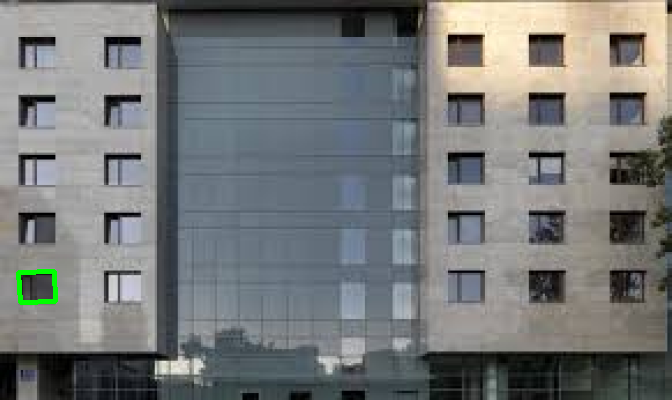

In [68]:
screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(screen_contour)

Ten kod rysuje pojedynczy kontur na obrazie za pomocą funkcji `cv2.drawContours` i wyświetla wynik za pomocą `cv2_imshow`.

Oto co robi każda linia:

1. `screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)`: Ta linia kodu rysuje pojedynczy kontur `screen_contour` na kopii obrazu `image`. Parametr `contours` zawiera listę konturów, w tym przypadku zawiera tylko jeden kontur `screen_contour`. Parametr `contourIdx` ustawiony na -1 oznacza, że wszystkie kontury zostaną narysowane. Parametr `color` określa kolor konturu, a `thickness` określa grubość linii.

2. `cv2_imshow(screen_contour)`: Ta linia kodu wyświetla obraz `screen_contour`, który zawiera narysowany kontur, za pomocą funkcji `cv2_imshow`. Ta funkcja jest często używana w środowisku Google Colab do wyświetlania obrazów.

Ogólnie rzecz biorąc, ten kod rysuje pojedynczy kontur na obrazie i wyświetla wynik, pozwalając na wizualną inspekcję tego konkretnego konturu.